In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('online_advertising_performance_data.csv')
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [29]:
df.isna().sum()

month                          0
day                            0
campaign_number                0
user_engagement                0
banner                         0
placement                    413
displays                       0
cost                           0
clicks                         0
revenue                        0
post_click_conversions         0
post_click_sales_amount        0
Unnamed: 12                15408
Unnamed: 13                15408
dtype: int64

In [30]:
df = df.drop(columns=['Unnamed: 12', 'Unnamed: 13'])

In [31]:
df

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000


In [32]:
df[df['placement'].isna()].head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
893,April,5,camp 1,High,728 x 90,NaN,8,0.0152,0,0.0,0,0.0
951,April,5,camp 2,Low,728 x 90,NaN,2,0.0016,0,0.0,0,0.0
957,April,5,camp 2,Medium,728 x 90,NaN,4,0.0076,0,0.0,0,0.0
1034,April,5,camp 3,Medium,728 x 90,NaN,1,0.0008,0,0.0,0,0.0
1042,April,6,camp 1,High,160 x 600,NaN,1,0.0006,0,0.0,0,0.0


In [33]:
df['placement'] = df['placement'].fillna('')

In [34]:
df

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000


In [35]:
df.isna().sum()

month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
dtype: int64

In [36]:
df['placement'].unique()

array(['abc', 'def', 'ghi', 'mno', 'jkl', ''], dtype=object)

In [37]:
df['month'].unique()

array(['April', 'May', 'June'], dtype=object)

In [38]:
df['campaign_number'].unique()

array(['camp 1', 'camp 2', 'camp 3'], dtype=object)

In [39]:
df['user_engagement'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [40]:
df['banner'].unique()  

array(['160 x 600', '240 x 400', '300 x 250', '468 x 60', '580 x 400',
       '670 x 90', '728 x 90', '800 x 250'], dtype=object)

In [41]:
le = LabelEncoder()

In [42]:
le

LabelEncoder()

In [43]:
df.head(100)

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,April,1,camp 2,Medium,300 x 250,abc,11,0.0170,0,0.0000,0,0.0000
96,April,1,camp 2,Medium,300 x 250,def,35227,14.1625,401,15.7612,14,839.2774
97,April,1,camp 2,Medium,300 x 250,ghi,33570,20.8269,1426,56.0374,38,2771.7170
98,April,1,camp 2,Medium,300 x 250,jkl,2324,1.3180,19,0.7470,0,0.0000


In [44]:
df['ROI'] = np.where(df['post_click_conversions'] > 0,
                     df['cost'] / df['post_click_conversions'],
                     0)
df[['ROI', 'cost', 'post_click_conversions']]

,ROI,cost,post_click_conversions
0,0.000000,0.0060,0
1,1.164452,26.7824,23
2,0.354236,27.6304,78
3,0.351499,216.8750,617
4,0.000000,0.0670,0
...,...,...,...
15403,0.000000,0.0249,0
15404,0.134800,0.4044,3
15405,0.000000,0.0157,0
15406,0.000000,0.0123,0


In [45]:
df_top5_bestinvestments = df.sort_values(by='ROI', ascending = False)[:5]
df_top5_bestinvestments

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,ROI
5177,April,25,camp 3,Medium,300 x 250,mno,120601,13.1724,472,25.1688,1,9.9715,13.1724
1249,April,6,camp 3,Medium,728 x 90,mno,151231,12.5544,416,21.2116,1,7.0110,12.5544
201,April,1,camp 3,Medium,728 x 90,mno,174462,12.3332,707,37.0550,1,136.5586,12.3332
821,April,4,camp 3,Medium,728 x 90,mno,162179,11.3176,470,24.3821,1,8.4299,11.3176
11852,June,6,camp 3,Medium,300 x 250,mno,139691,11.0075,441,23.6771,1,6.6843,11.0075


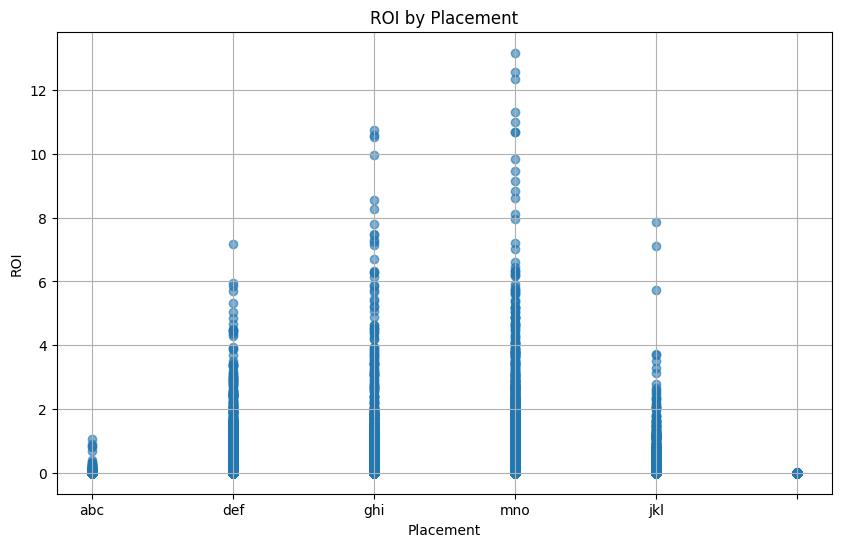

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(df['placement'], df['ROI'], alpha=0.6)
plt.xlabel('Placement')
plt.ylabel('ROI')
plt.title('ROI by Placement')
plt.grid(True)
plt.show()

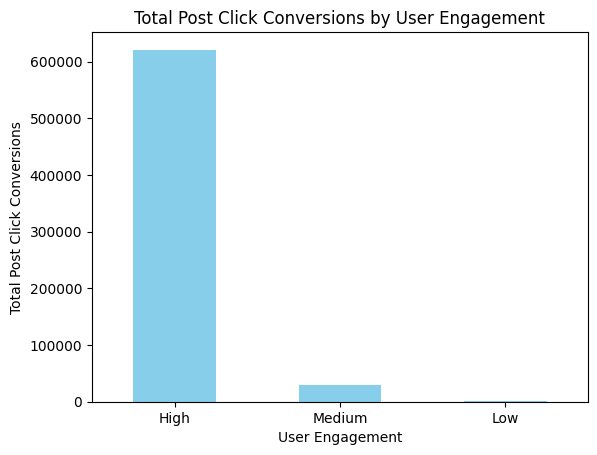

In [47]:
user_engagement_conversions = df.groupby('user_engagement')['post_click_conversions'].sum().sort_values(ascending=False)

user_engagement_conversions.plot(kind='bar', color='skyblue')
plt.xlabel('User Engagement')
plt.ylabel('Total Post Click Conversions')
plt.title('Total Post Click Conversions by User Engagement')
plt.xticks(rotation=0)
plt.show()

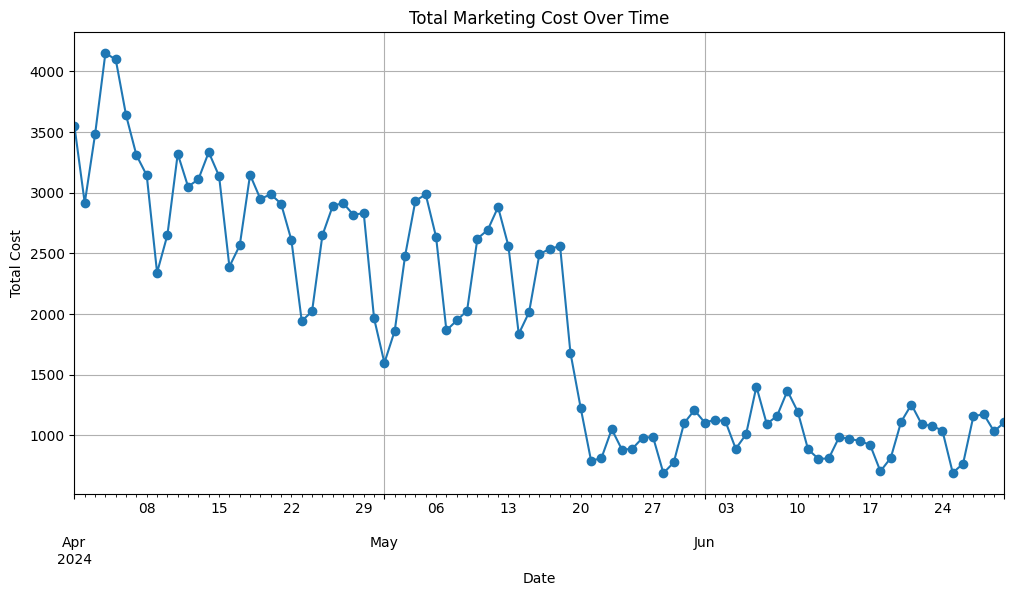

In [48]:
# Convert 'month' and 'day' to a datetime column for time-based analysis
df['date'] = pd.to_datetime(df['month'] + ' ' + df['day'].astype(str) + ' 2024')

# Example: Plot total cost over time
df.groupby('date')['cost'].sum().plot(figsize=(12,6), marker='o')
plt.xlabel('Date')
plt.ylabel('Total Cost')
plt.title('Total Marketing Cost Over Time')
plt.grid(True)
plt.show()

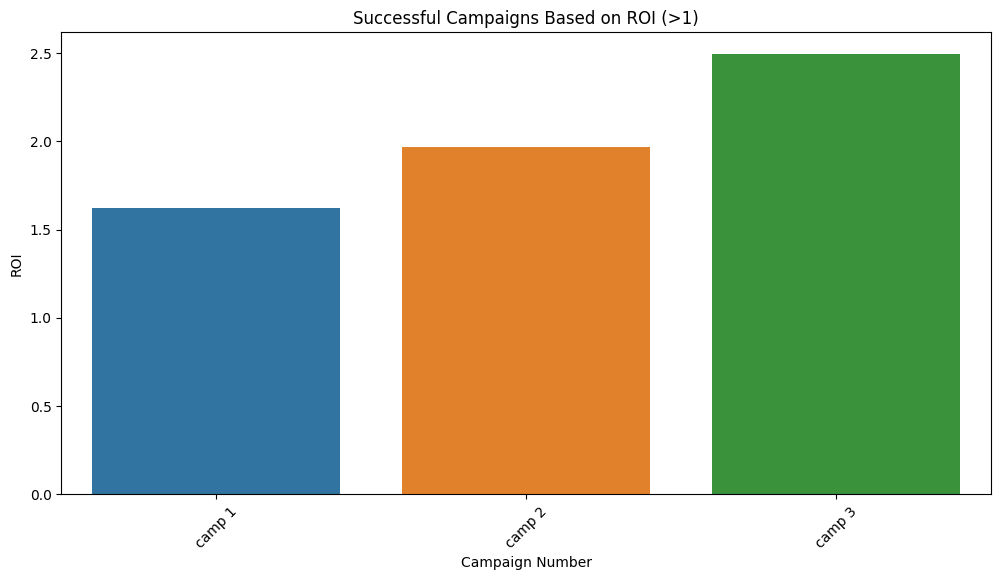

In [49]:
# Define a threshold for a "successful" campaign, e.g., ROI > 1
successful_campaigns = df[df['ROI'] > 1]

plt.figure(figsize=(12,6))
sns.barplot(data=successful_campaigns, x='campaign_number', y='ROI', ci=None)
plt.title('Successful Campaigns Based on ROI (>1)')
plt.xlabel('Campaign Number')
plt.ylabel('ROI')
plt.xticks(rotation=45)
plt.show()

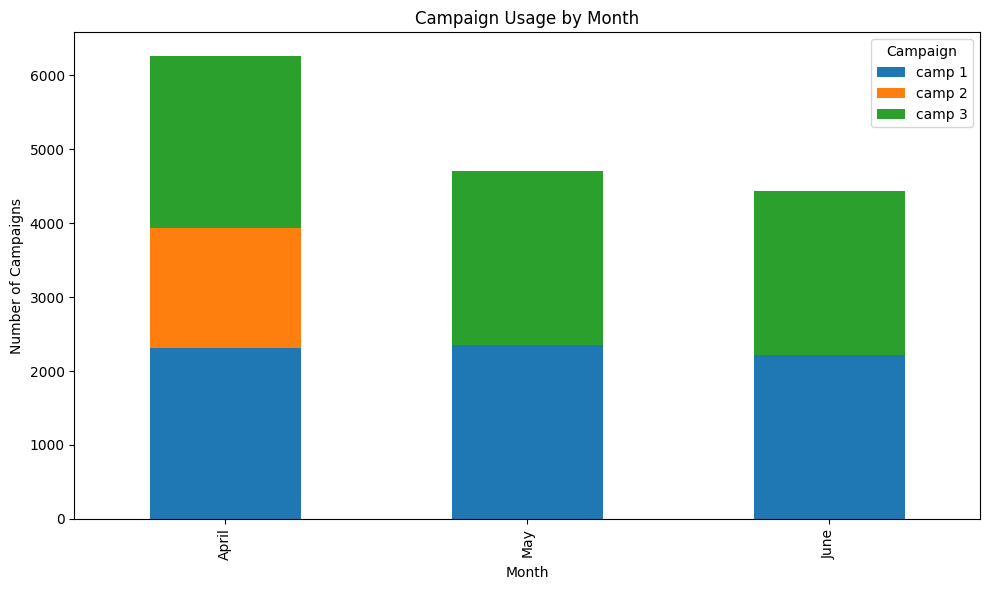

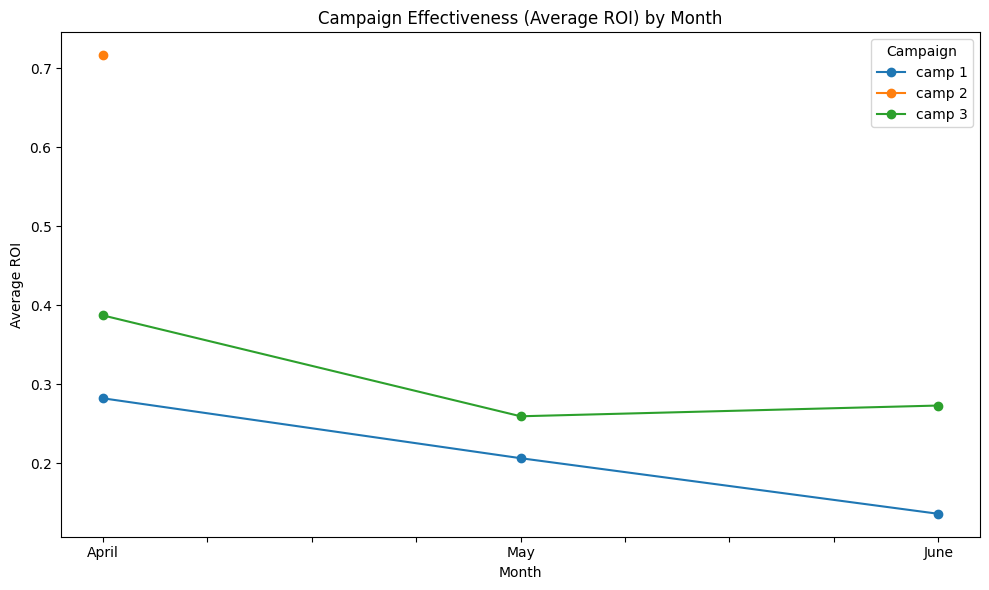

In [50]:
# Group by date and campaign_number to get total usage and average ROI per campaign per day
campaign_usage = df.groupby(['date', 'campaign_number']).agg(
    usage_count=('campaign_number', 'count'),
    avg_roi=('ROI', 'mean')
).reset_index()


# Extract month from the date for grouping
campaign_usage['month'] = campaign_usage['date'].dt.strftime('%B')

# Group by month and campaign_number
monthly_campaign_usage = campaign_usage.groupby(['month', 'campaign_number']).agg(
    usage_count=('usage_count', 'sum'),
    avg_roi=('avg_roi', 'mean')
).reset_index()

# Ensure months are in calendar order
month_order = ['April', 'May', 'June']
monthly_campaign_usage['month'] = pd.Categorical(monthly_campaign_usage['month'], categories=month_order, ordered=True)
monthly_campaign_usage = monthly_campaign_usage.sort_values('month')

# Pivot for stacked bar plot (usage)
usage_month_pivot = monthly_campaign_usage.pivot(index='month', columns='campaign_number', values='usage_count').fillna(0)

# Plot campaign usage by month
usage_month_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Number of Campaigns')
plt.title('Campaign Usage by Month')
plt.legend(title='Campaign')
plt.tight_layout()
plt.show()

# Pivot for line plot (effectiveness)
roi_month_pivot = monthly_campaign_usage.pivot(index='month', columns='campaign_number', values='avg_roi')

# Plot average ROI per campaign by month
roi_month_pivot.plot(figsize=(10,6), marker='o')
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.title('Campaign Effectiveness (Average ROI) by Month')
plt.legend(title='Campaign')
plt.tight_layout()
plt.show()

In [51]:
for col in df.columns:
   if df[col].dtype == 'object':
       df[col] = le.fit_transform(df[col])

In [52]:
sc = StandardScaler()

scaleddf = sc.fit_transform(df.drop(columns=['date']))

In [53]:
df.columns

Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount', 'ROI', 'date'],
      dtype='object')

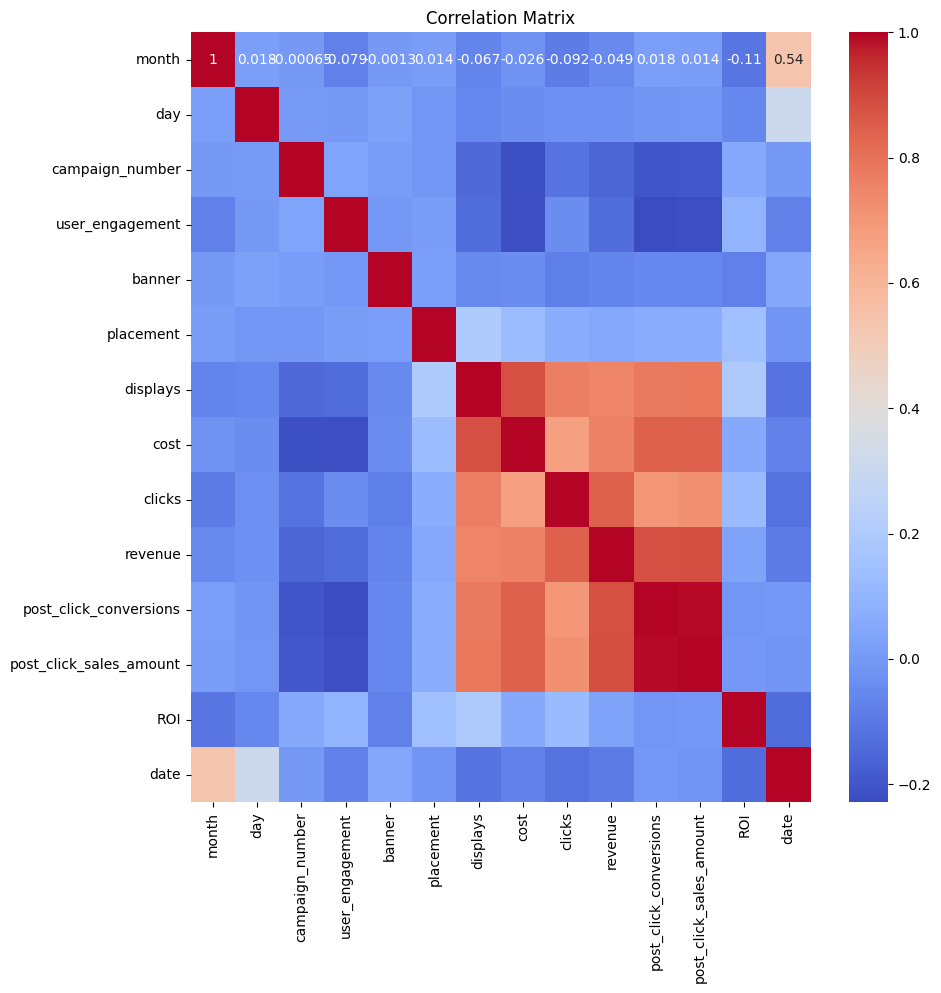

In [73]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

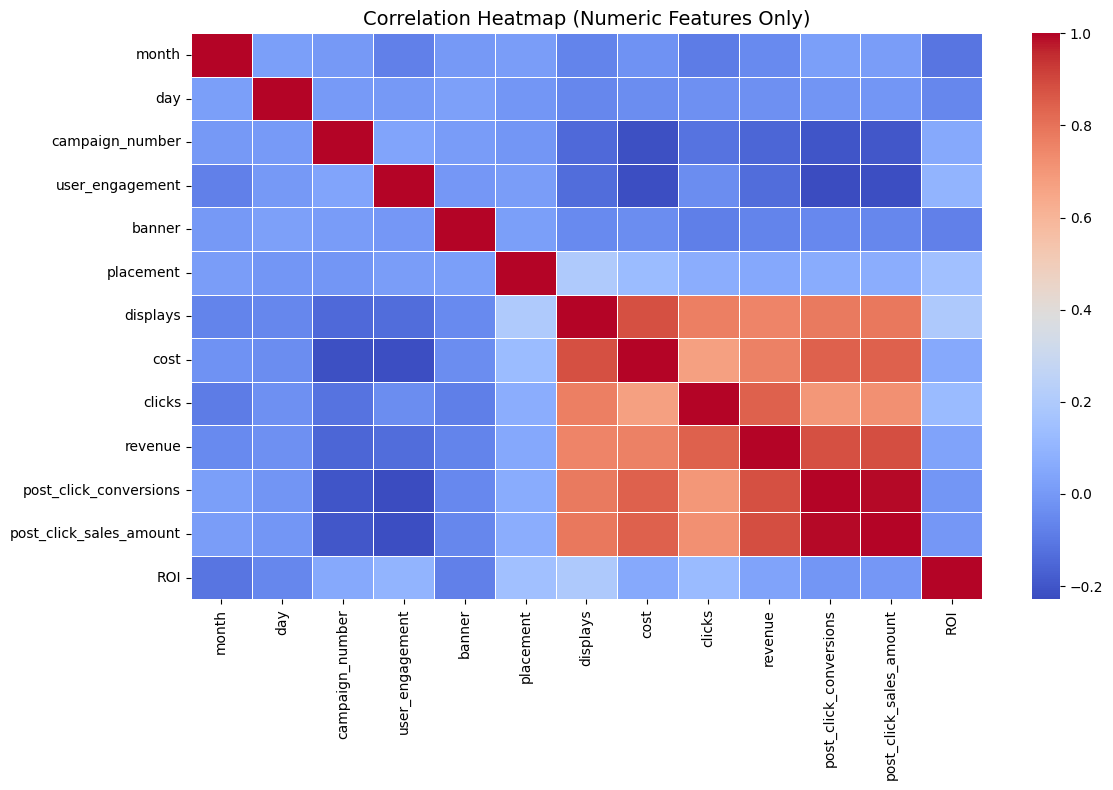

In [70]:
plt.figure(figsize=(12,8))

# Compute correlation
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    linewidths=0.5,
    annot=False
)

plt.title('Correlation Heatmap (Numeric Features Only)', fontsize=14)
plt.tight_layout()
plt.show()


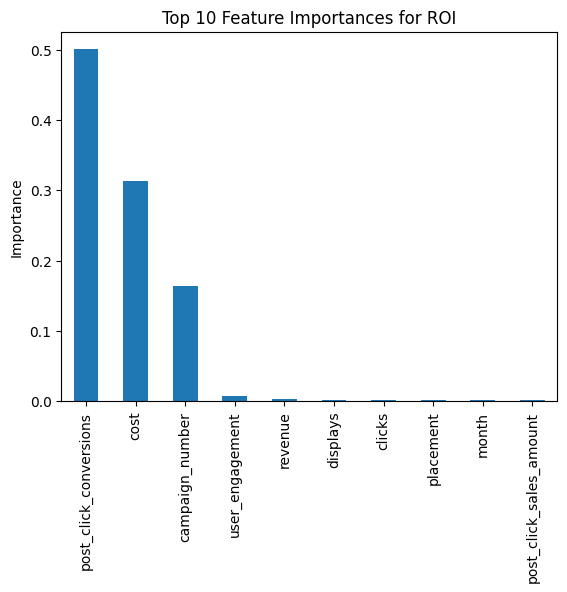

In [55]:
X = df.drop(columns=['ROI', 'date'])
X = pd.get_dummies(X)  # One-hot encode categorical variables
y = df['ROI']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances for ROI')
plt.ylabel('Importance')
plt.show()

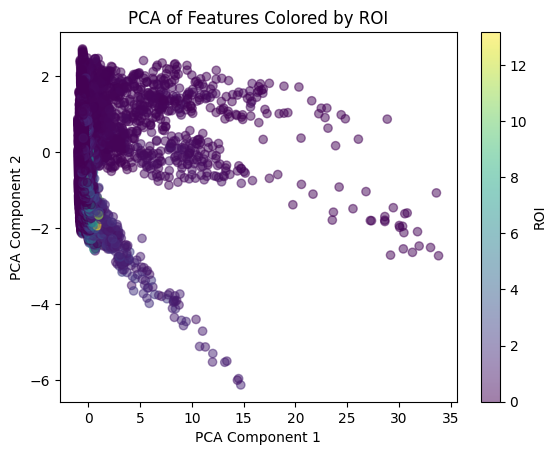

In [56]:
pca = PCA(n_components=2)
X_scaled = sc.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Features Colored by ROI')
plt.colorbar(label='ROI')
plt.show()

# Completed...!